In [5]:
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt

df = pd.DataFrame(
   {"Pprob" : [88,87,81,80,79,77,76,75,74,71,70,69,65,61,58,52,49,45,35,24,],
    "Act_Response": [1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,]
   })

df["Pprob"] =  df["Pprob"]/100
df["Neg_Prob"] = 1- df["Pprob"]
df.head()



,Pprob,Act_Response,Neg_Prob
0,0.88,1,0.12
1,0.87,0,0.13
2,0.81,1,0.19
3,0.80,1,0.20
4,0.79,1,0.21


In [17]:
import numpy as np


def cumulative_gain_curve(y_true, y_score, pos_label=None):

    y_true, y_score = np.asarray(y_true), np.asarray(y_score)

    # ensure binary classification if pos_label is not specified
    classes = np.unique(y_true)
    if (pos_label is None and
        not (np.array_equal(classes, [0, 1]) or
             np.array_equal(classes, [-1, 1]) or
             np.array_equal(classes, [0]) or
             np.array_equal(classes, [-1]) or
             np.array_equal(classes, [1]))):
        raise ValueError("Data is not binary and pos_label is not specified")
    elif pos_label is None:
        pos_label = 1.

    # make y_true a boolean vector
    y_true = (y_true == pos_label)
    #1.Sort the y_true  w.r.t y_score in decreasing order of probability.
    sorted_indices = np.argsort(y_score)[::-1]
    y_true = y_true[sorted_indices]
    #2. Find the cumulative sum.
    gains = np.cumsum(y_true)
    percentages = np.arange(start=1, stop=len(y_true) + 1)
    #3.Normalize it so that min value is 0 and max value is 1.
    gains = gains / float(np.sum(y_true))
    #4.Find the percentage of sample.
    percentages = percentages / float(len(y_true))

    gains = np.insert(gains, 0, [0])
    percentages = np.insert(percentages, 0, [0])
    return percentages, gains


def plot_lift_curve(y_true, y_probas, title='Lift Curve',
                    ax=None, figsize=None, title_fontsize="large",
                    text_fontsize="medium"):
    """Generates the Lift Curve from labels and scores/probabilities
    http://www2.cs.uregina.ca/~dbd/cs831/notes/lift_chart/lift_chart.html.
    The implementation here works only for binary classification.
    """
    y_true = np.array(y_true)
    y_probas = np.array(y_probas)

    classes = np.unique(y_true)
    if len(classes) != 2:
        raise ValueError('Cannot calculate Lift Curve for data with '
                         '{} category/ies'.format(len(classes)))

    # Compute Cumulative Gain Curves
    #percentages, gains1 = cumulative_gain_curve(y_true, y_probas[:, 0]classes[0])
    percentages, gains2 = cumulative_gain_curve(y_true, y_probas[:, 1],
                                                classes[1])

    percentages = percentages[1:]
    #gains1 = gains1[1:]
    gains2 = gains2[1:]
    #gains1 = gains1 / percentages
    print("Display_Gain ",gains2)
    print("Display_percentages",percentages)
    gains2 = gains2 / percentages
    print("Display_lift ",gains2)

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    ax.set_title(title, fontsize=title_fontsize)
    ax.plot(percentages, gains2, lw=3, label='Class {}'.format(classes[1]))
    ax.plot([0, 1], [1, 1], 'k--', lw=2, label='Baseline')
    ax.set_xlabel('Percentage of sample', fontsize=text_fontsize)
    ax.set_ylabel('Lift', fontsize=text_fontsize)
    ax.tick_params(labelsize=text_fontsize)
    ax.grid('on')
    ax.legend(loc='lower right', fontsize=text_fontsize)

    return ax

In [15]:
percentages, gains2 = cumulative_gain_curve( df["Act_Response"].values, df[["Neg_Prob","Pprob"]].values[:, 1],1)



(21,)
(21,)
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[0.1 0.1 0.2 0.3 0.4 0.4 0.5 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 0.9 0.9 0.9
 1.  1. ]
[1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0]


Display_Gain  [0.1 0.1 0.2 0.3 0.4 0.4 0.5 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 0.9 0.9 0.9
 1.  1. ]
Display_percentages [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
Display_lift  [2.         1.         1.33333333 1.5        1.6        1.33333333
 1.42857143 1.25       1.33333333 1.4        1.45454545 1.33333333
 1.38461538 1.28571429 1.2        1.125      1.05882353 1.
 1.05263158 1.        ]


<AxesSubplot: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

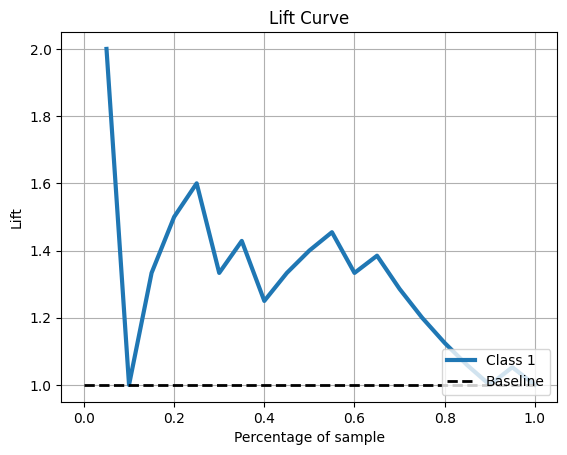

In [18]:
plot_lift_curve(y_true =df["Act_Response"].values, y_probas = df[["Neg_Prob","Pprob"]].values)
